Data shape: (20, 2), tau: 3.0


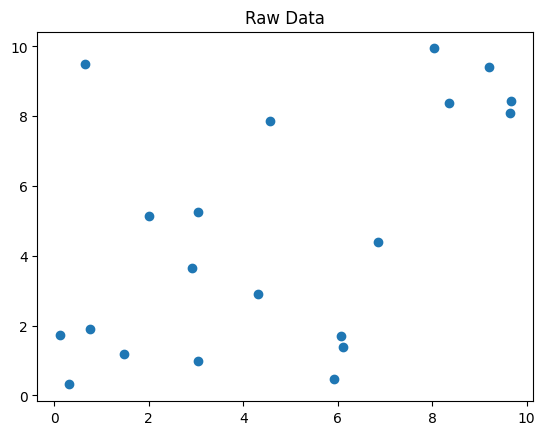

In [1]:
# Cell 1: Data & Params
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from itertools import product
import networkx as nx

np.random.seed(42)
N = 20
tau = 0.15 * N  # ~3 points

# Cluster 1: bottom-left
cluster1 = np.random.uniform(0, 2, (4,2))
# Cluster 2: top-right
cluster2 = np.random.uniform(8,10, (4,2))
# Noise
noise = np.random.uniform(0,10, (12,2))

data = np.vstack([cluster1, cluster2, noise])
print(f'Data shape: {data.shape}, tau: {tau}')
# Visualize raw
plt.scatter(data[:,0], data[:,1]); plt.title('Raw Data'); plt.show()


In [2]:
# Cell 2: Grid & Binning (2D)
n_bins = 5
bin_edges = np.linspace(0, 10, n_bins+1)
bin_idx = np.floor_divide(data, 2).astype(int)  # bin size=2
print('Sample bin indices:\n', bin_idx[:5])

grid_counts = Counter(map(tuple, bin_idx))
dense_cells = {cell: count for cell, count in grid_counts.items() if count >= tau}
print('Dense cells:', dense_cells)


Sample bin indices:
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [4 4]]
Dense cells: {(np.int64(0), np.int64(0)): 4, (np.int64(4), np.int64(4)): 5}


In [3]:
# Cell 3: 1D Dense (bottom-up)
def get_1d_dense(dim):
    proj = bin_idx[:, dim]
    counts1d = Counter(proj)
    return [i for i,c in counts1d.items() if c >= tau]

dense1_x = get_1d_dense(0)  # [0,4]
dense1_y = get_1d_dense(1)  # [0,4]
print('1D dense x:', dense1_x, 'y:', dense1_y)


1D dense x: [np.int64(0), np.int64(4), np.int64(1), np.int64(2), np.int64(3)] y: [np.int64(0), np.int64(4), np.int64(2)]


In [4]:
# Cell 4: Connectivity Graph & Clusters
def adjacent(cell1, cell2):
    return sum(abs(a-b)==1 and c==d for (a,c),(b,d) in zip(cell1,cell2) for _ in [0]) == 1  # share face, one dim

G = nx.Graph()
G.add_nodes_from(dense_cells)
for c1, c2 in product(dense_cells, repeat=2):
    if c1 < c2 and adjacent(c1, c2): G.add_edge(c1, c2)

clusters = list(nx.connected_components(G))
print('Clusters:', clusters)  # [{(0,0)}, {(4,4)}]


TypeError: cannot unpack non-iterable numpy.int64 object